In [1]:
print("hellow world")

hellow world


# Step by step guide on using Yolov5 to detect defects on PCB
### For suggestion, use Google Colaboratory or Kaggle notebook to run this.
Reason : to speed up the training process due to the quite high computational cost needed to run YoloV5 and pretty much any computer vision model.

The model being used is YoloV5 which will be pulled from a github repository and the data being used is from this this repository : which was modified to be able to use in YoloV5.

In this notebook, all data is being kept inside a google drive folder and all process will be sent inside the google drive folder.

This notebook was created inside google colaboratory, change accordingly for Kaggle notebooks.

<br>Steps
1. Insert the zip file named yoloData.zip into a google drive folder
2. Change runtime type by using GPU/TPU accelaration
3. Follow each steps inside this notebook
4. All images/output will be saved inside the google drive folder
5. Best weights will also be saved inside a folder


# Install dependencies

In [3]:
import os
from random import choice
import shutil
import glob
from PIL import Image
from urllib.parse import quote
os.environ["WANDB_MODE"] = "disabled"

In [4]:
#clones the Yolov5 model from github
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17265, done.
remote: Total 17265 (delta 0), reused 0 (delta 0), pack-reused 17265 (from 1)
Receiving objects: 100% (17265/17265), 16.09 MiB | 29.22 MiB/s, done.
Resolving deltas: 100% (11855/11855), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 913.6/913.6 kB 23.6 MB/s eta 0:00:00


# Mounting Google Drive
Change the directory below to your folder where the data is being kept.

In [5]:
from google.colab import drive
drive.mount('/content/drive')

#create the main folder
folder_path = '/content/drive/MyDrive/yolodatasetprocessed'
os.makedirs(folder_path, exist_ok=True)

yoloData_folder = os.path.join(folder_path, "yoloData")
os.makedirs(yoloData_folder, exist_ok=True)

Mounted at /content/drive


In [ ]:
#unzip the data with this inside a folder called yoloData
!unzip /content/drive/MyDrive/yoloData.zip -d /content/drive/MyDrive/yolodatasetprocessed/yoloData

In [10]:
#this creates the .yaml file needed to run the model and insert it inside the model

data_dir = "/content/drive/MyDrive/yolodatasetprocessed/yoloData"
yolo_dir="/content/yolov5"

all_data_yaml = f"""
path: {data_dir}
train: images/train
val: images/val

names:
    0: missing_hole
    1: mouse_bite
    2: open_circuit
    3: short
    4: spur
    5: spurious_copper
"""

data_path = os.path.join(yolo_dir, 'data.yaml')

with open(data_path, 'w') as f:
    f.write(all_data_yaml)

In [11]:
#trains the model based on the following Hyperparameters

#change name according to each version of the run
!python train.py --img 416 --batch 16 --epochs 275 --data data.yaml --weights yolov5s.pt --cache --name pcb_3rd

Streaming output truncated to the last 5000 lines.
  with torch.cuda.amp.autocast(amp):
    208/274      2.17G    0.02899   0.008971    0.00294         95        416:  60% 21/35 [00:05<00:03,  3.82it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
    208/274      2.17G    0.02955   0.008922   0.002982        115        416:  63% 22/35 [00:05<00:03,  3.62it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
    208/274      2.17G     0.0295   0.008912   0.002938         96        416:  66% 23/35 [00:05<00:02,  4.13it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):


In [13]:
#evaluates the result of validation based on the best weights

#change the run location to fit the current run directory

!python val.py --weights runs/train/pcb_3rd4/weights/best.pt  --data data.yaml

val: data=data.yaml, weights=['runs/train/pcb_3rd4/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-397-gde62f93c Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7026307 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/drive/MyDrive/yolodatasetprocessed/yoloData/labels/val.cache... 138 images, 0 backgrounds, 0 corrupt: 100% 138/138 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 5/5 [00:16<00:00,  3.24s/it]
                   all        138        609      0.932      0.908      0.924      0.471
          missing_hole        138        109      0.859      0.991      0.952      0.566
        

# Results
The confusion matrix, PR Curve, and other such results created will be saved inside a folder in google drive and in an array.

To display it within the notebook, just change the { arr[number] }

In [14]:
#saves the output into the folder inside gdrive and an array


#change the folder_path {pcb_3rd4} into the run name
folder_path = os.path.join(yolo_dir, "runs", "train", "pcb_3rd4")
os.makedirs(folder_path, exist_ok=True)

outpng_path =os.path.join(data_dir, "outputpng")
os.makedirs(outpng_path, exist_ok=True)

outjpg_path =os.path.join(data_dir, "outputjpg")
os.makedirs(outjpg_path, exist_ok=True)

png_files = glob.glob(os.path.join(folder_path, "*.png"))
jpg_files = glob.glob(os.path.join(folder_path, "*.jpg"))

jpg_arr=[]
png_arr=[]

for file_path in png_files:
    png_arr.append(file_path)
    output_file_path = os.path.join(outpng_path, os.path.basename(file_path))
    Image.open(file_path).save(output_file_path)

for file_path in jpg_files:
    jpg_arr.append(file_path)
    output_file_path = os.path.join(outjpg_path, os.path.basename(file_path))
    Image.open(file_path).save(output_file_path)

print(len(png_arr))
print(len(jpg_arr))

6
11


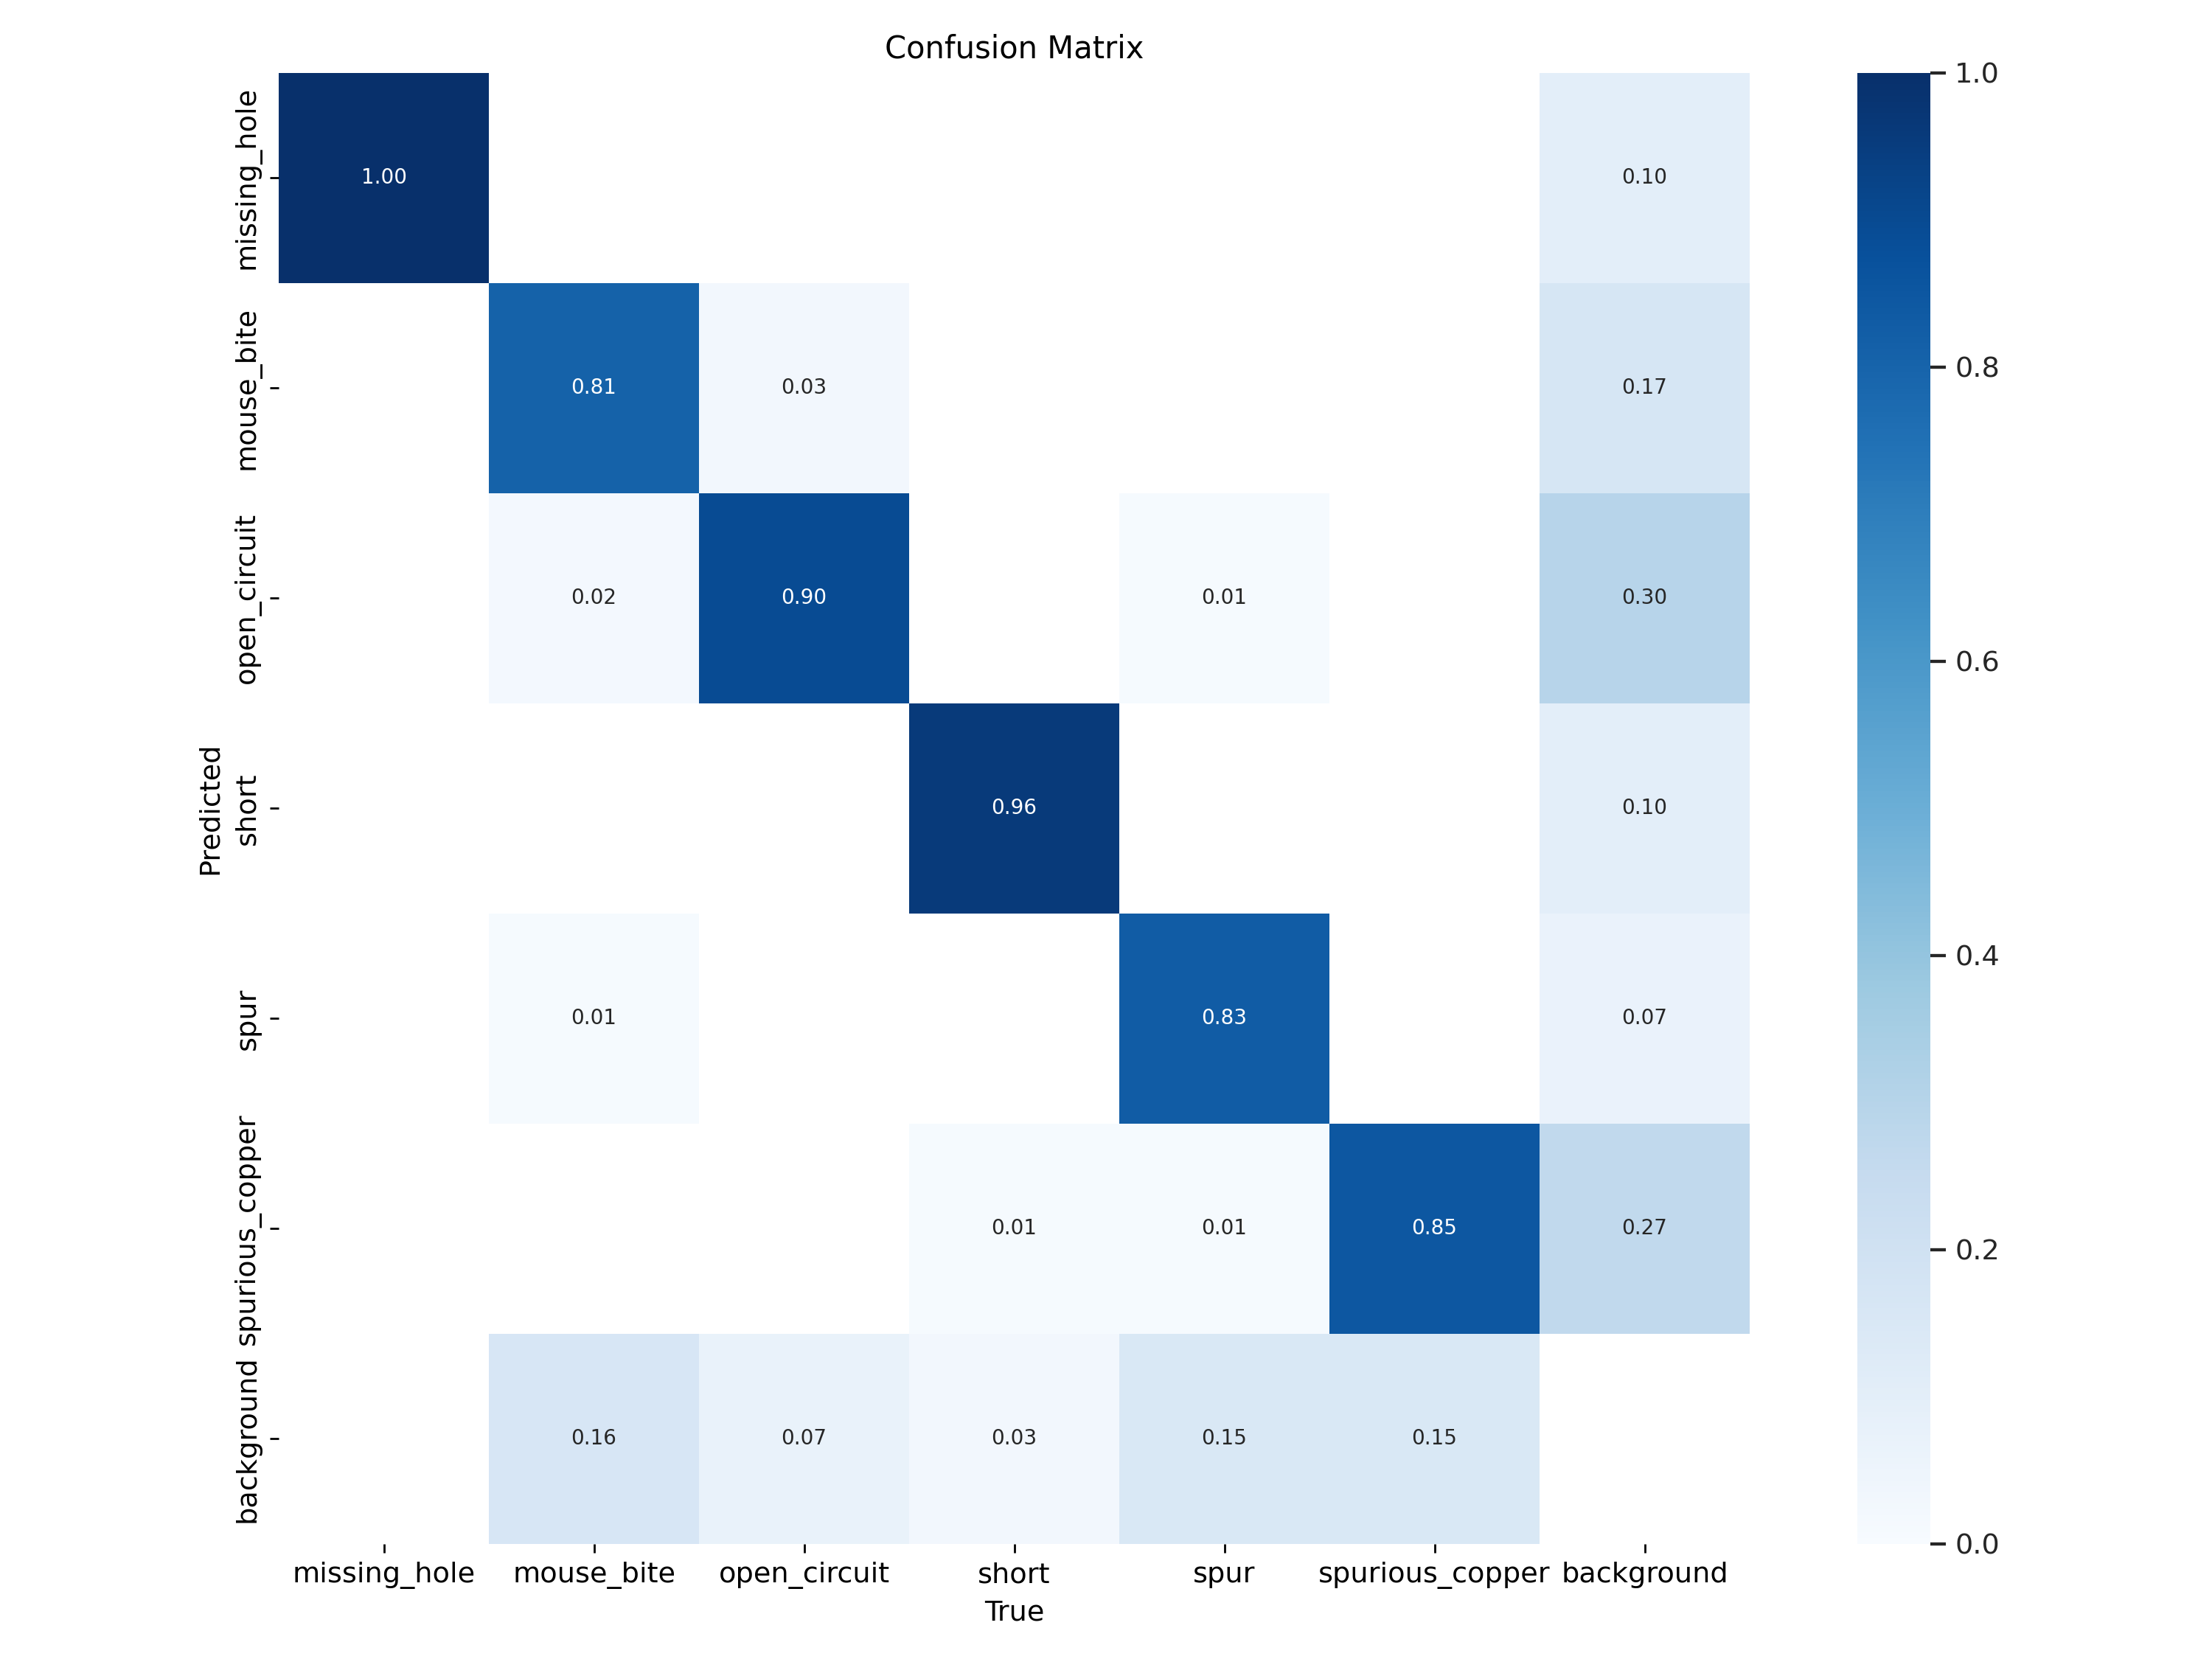

In [15]:
Image.open(png_arr[0])

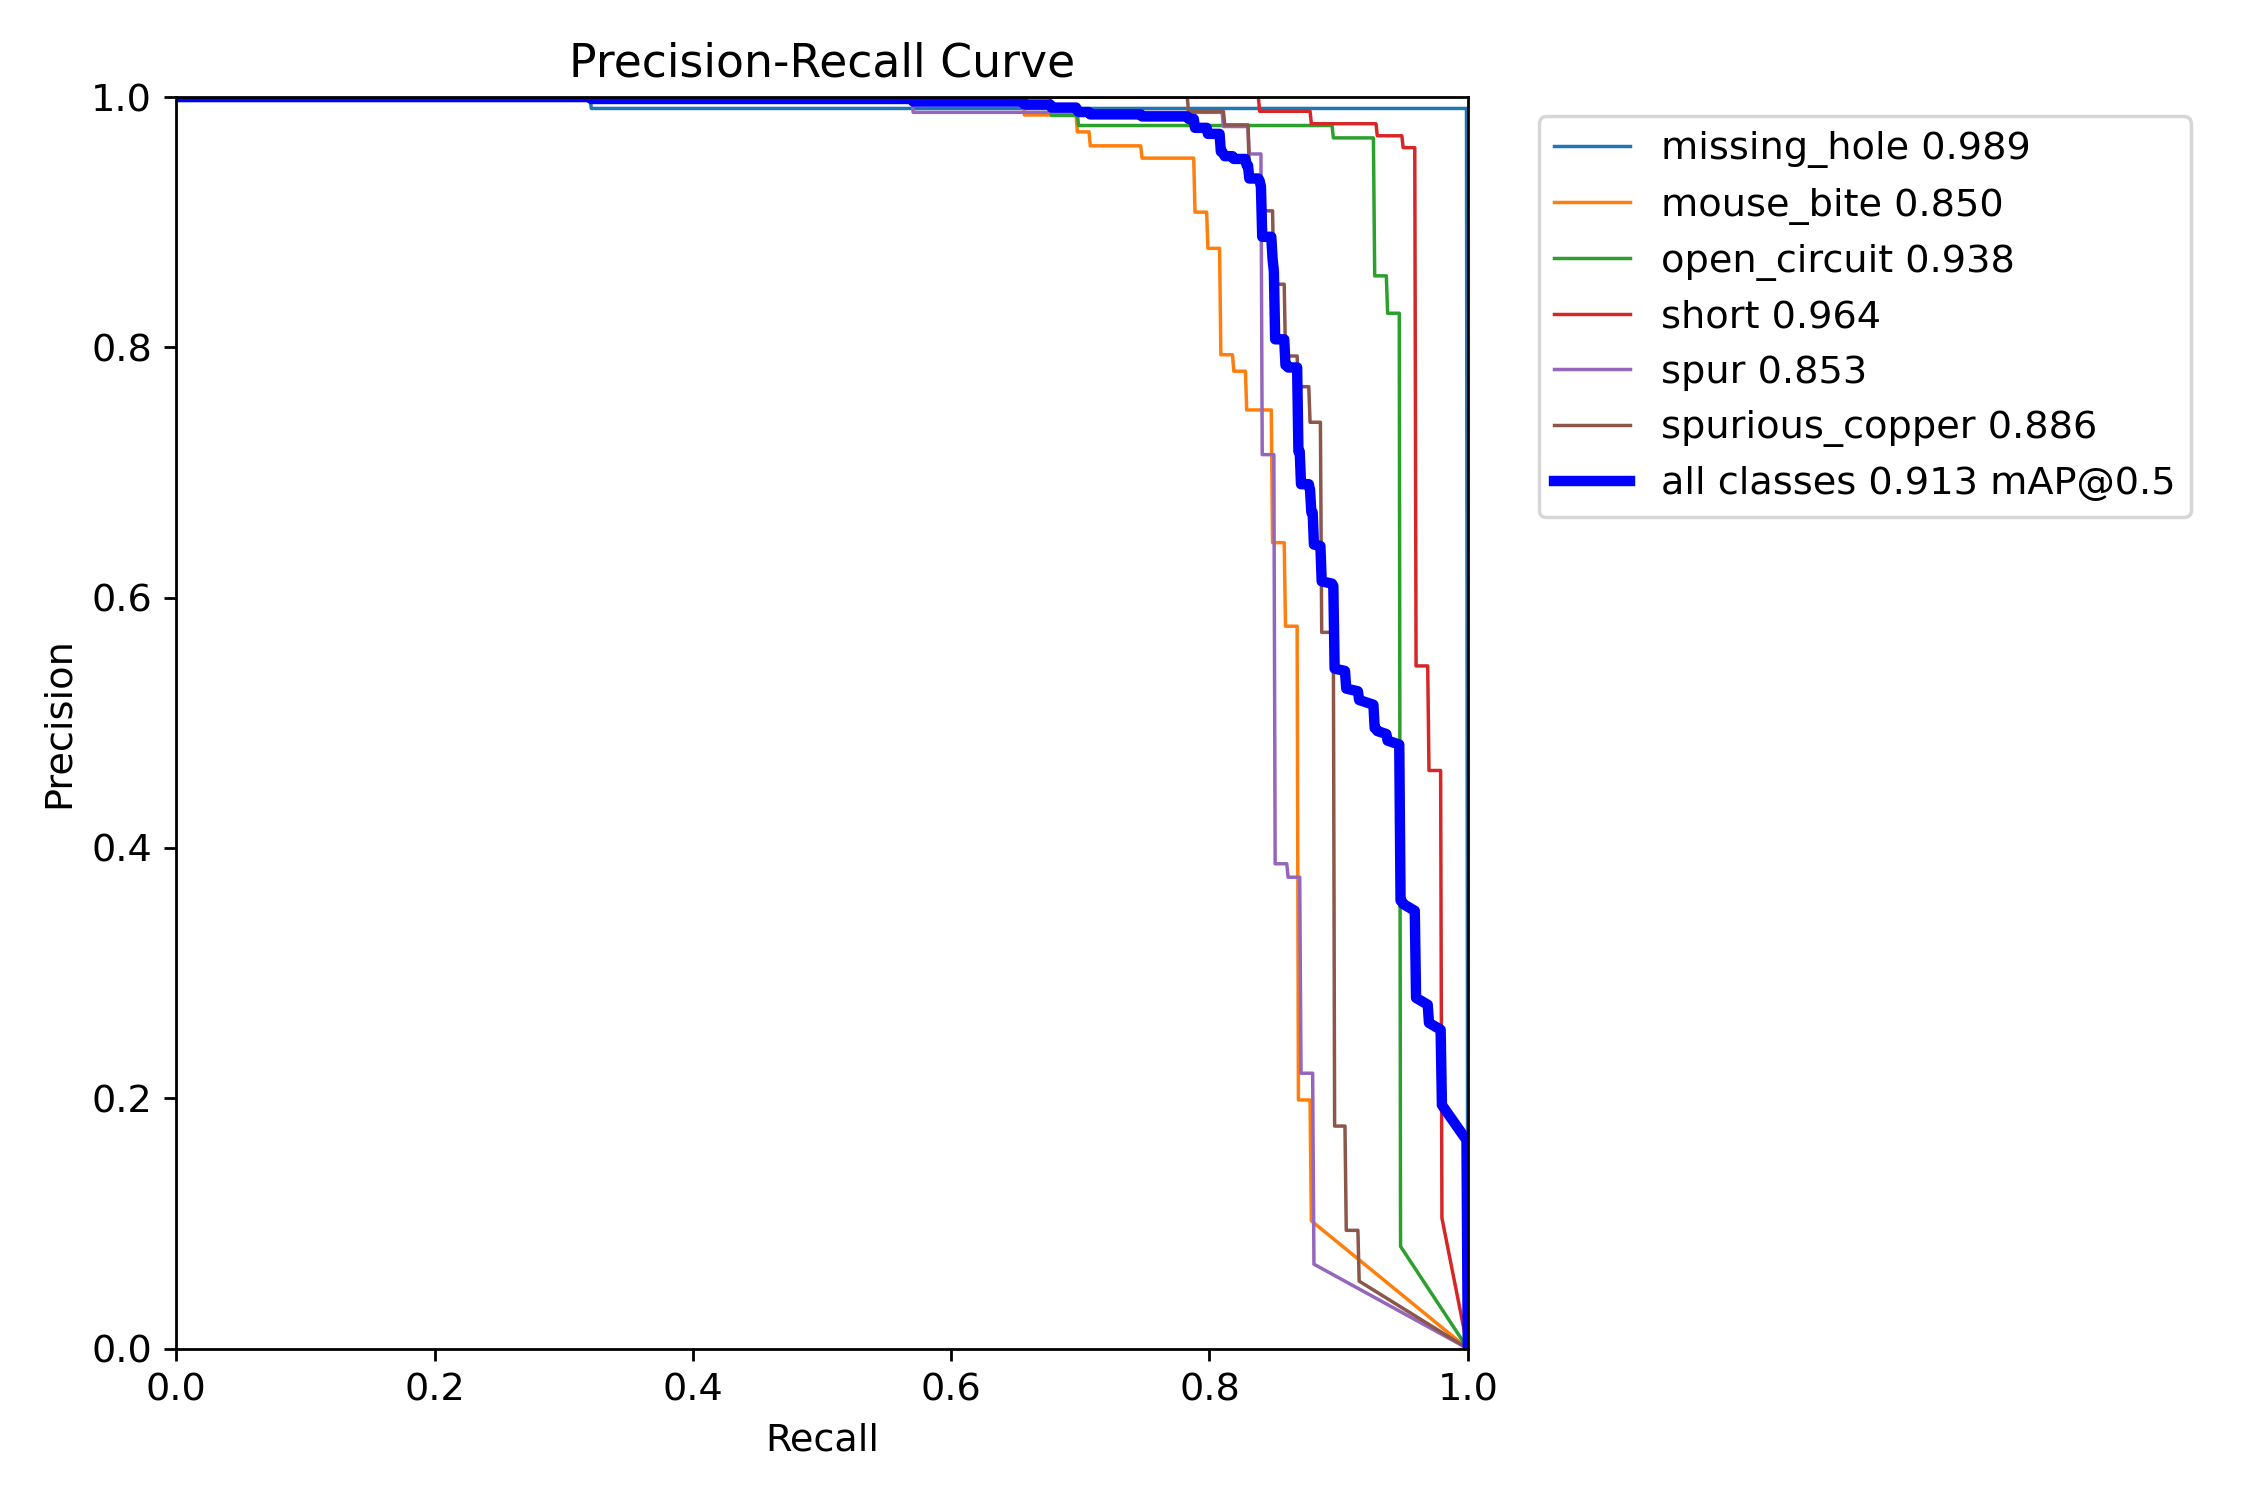

In [16]:
Image.open(png_arr[1])

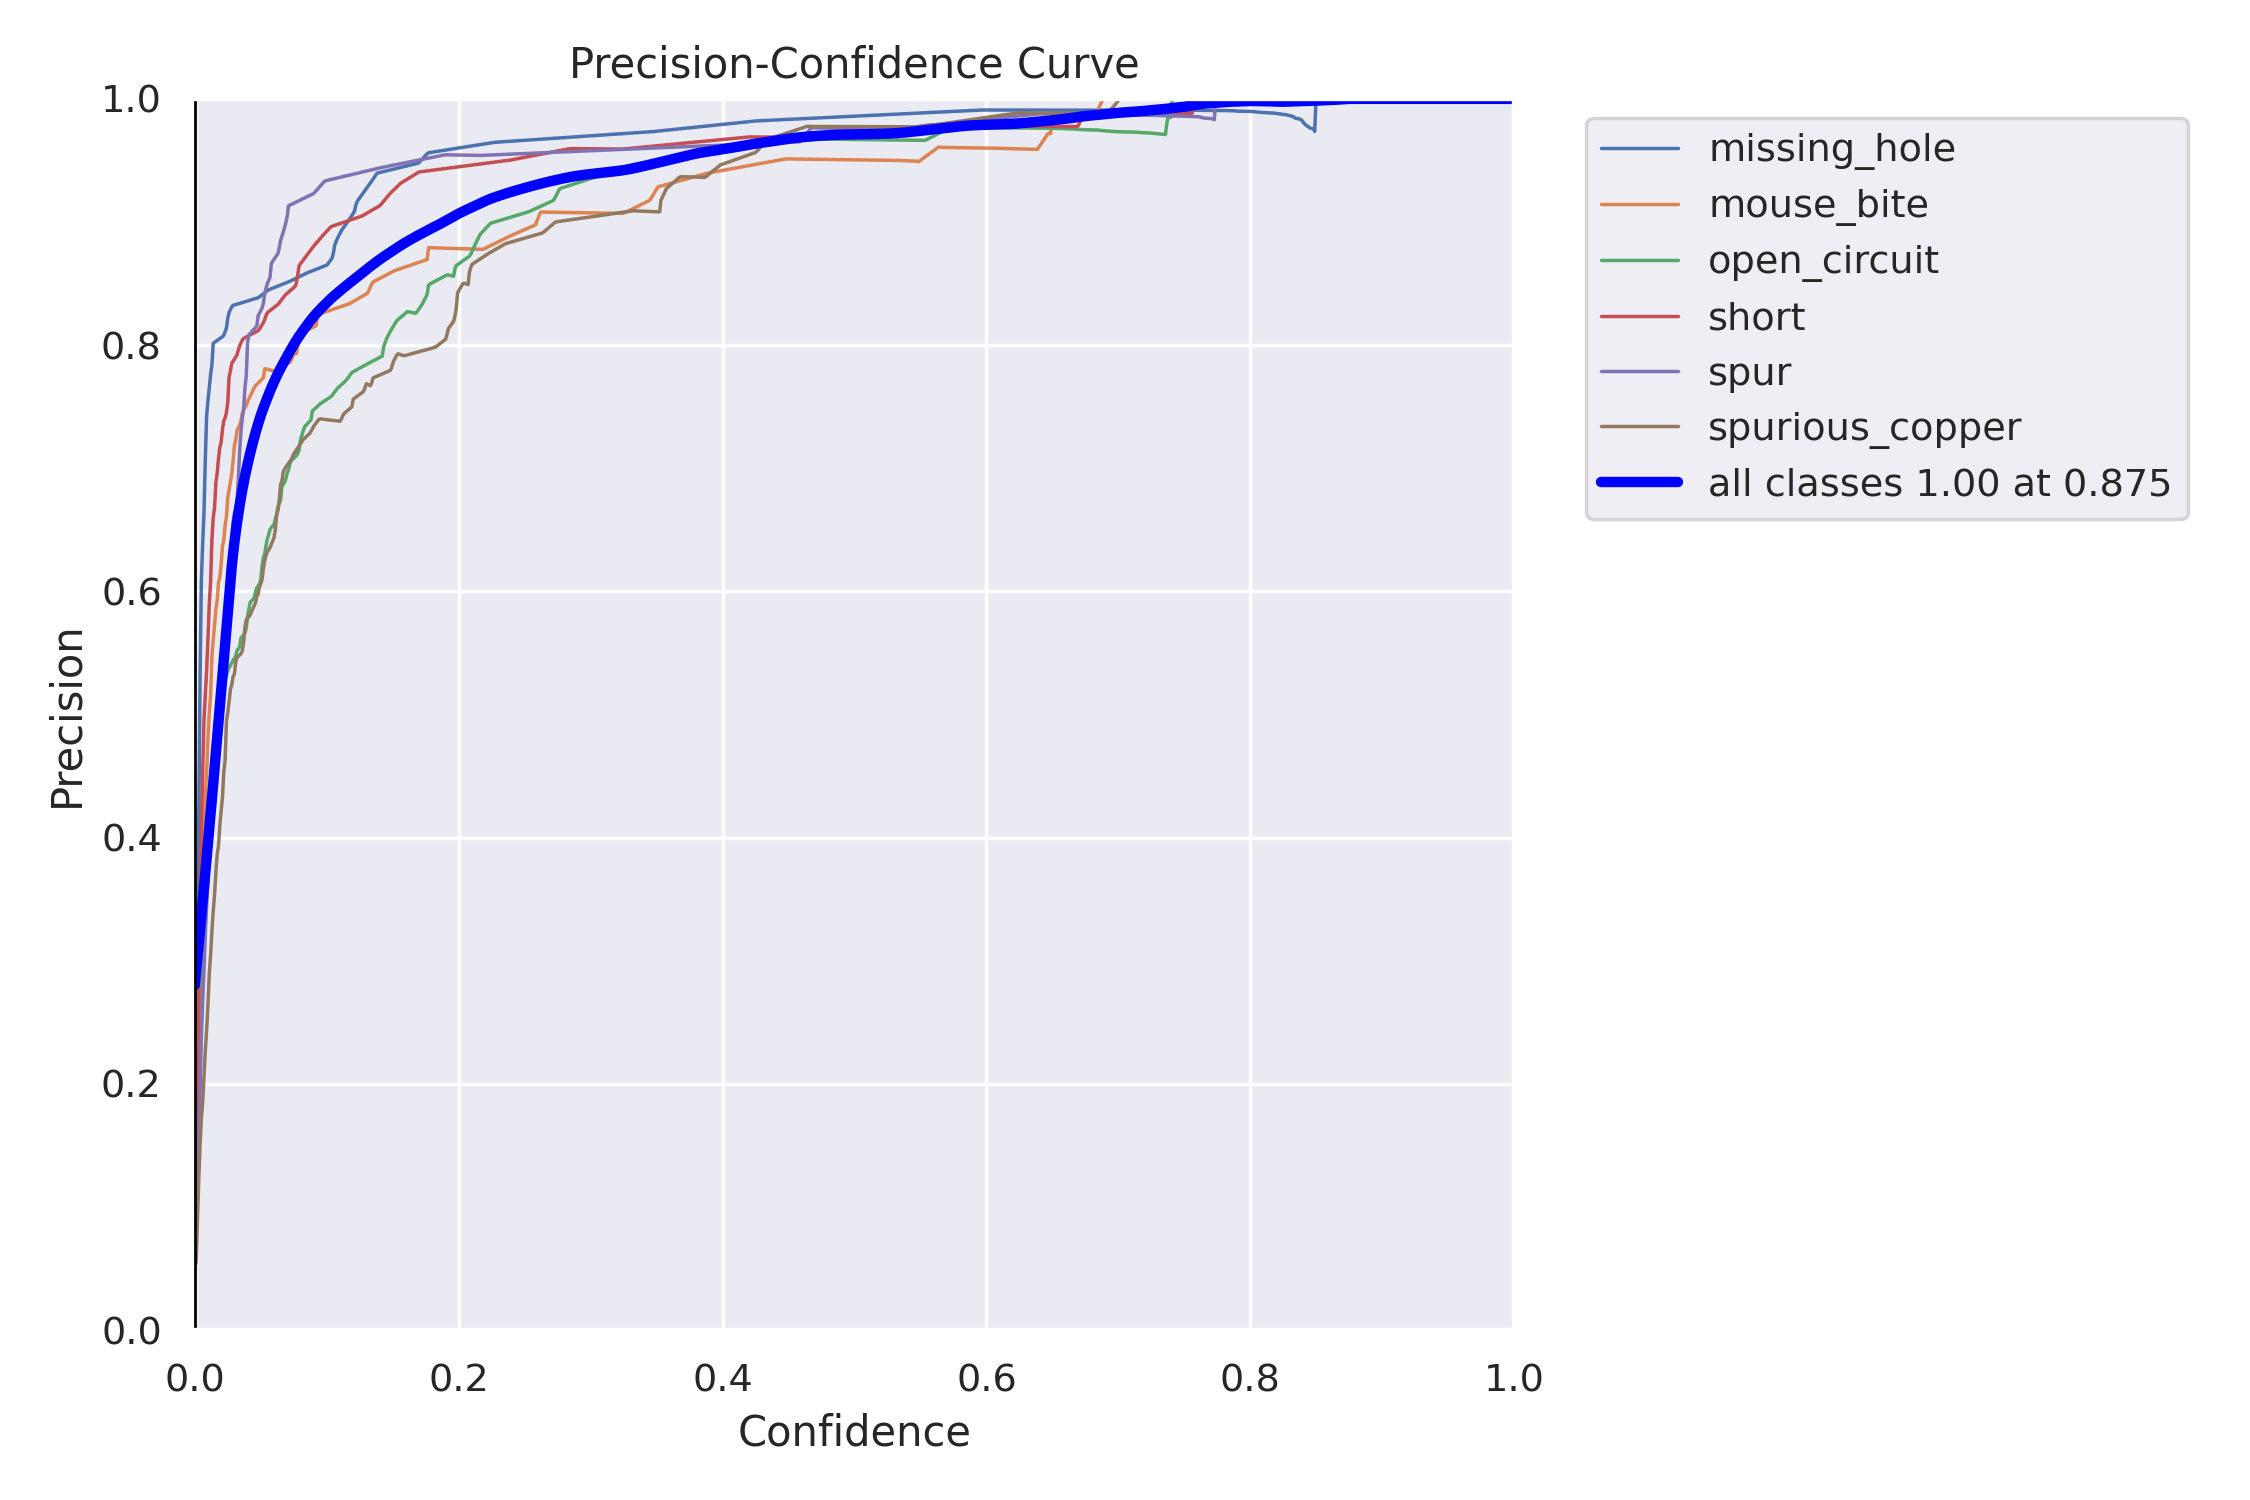

In [17]:
Image.open(png_arr[2])

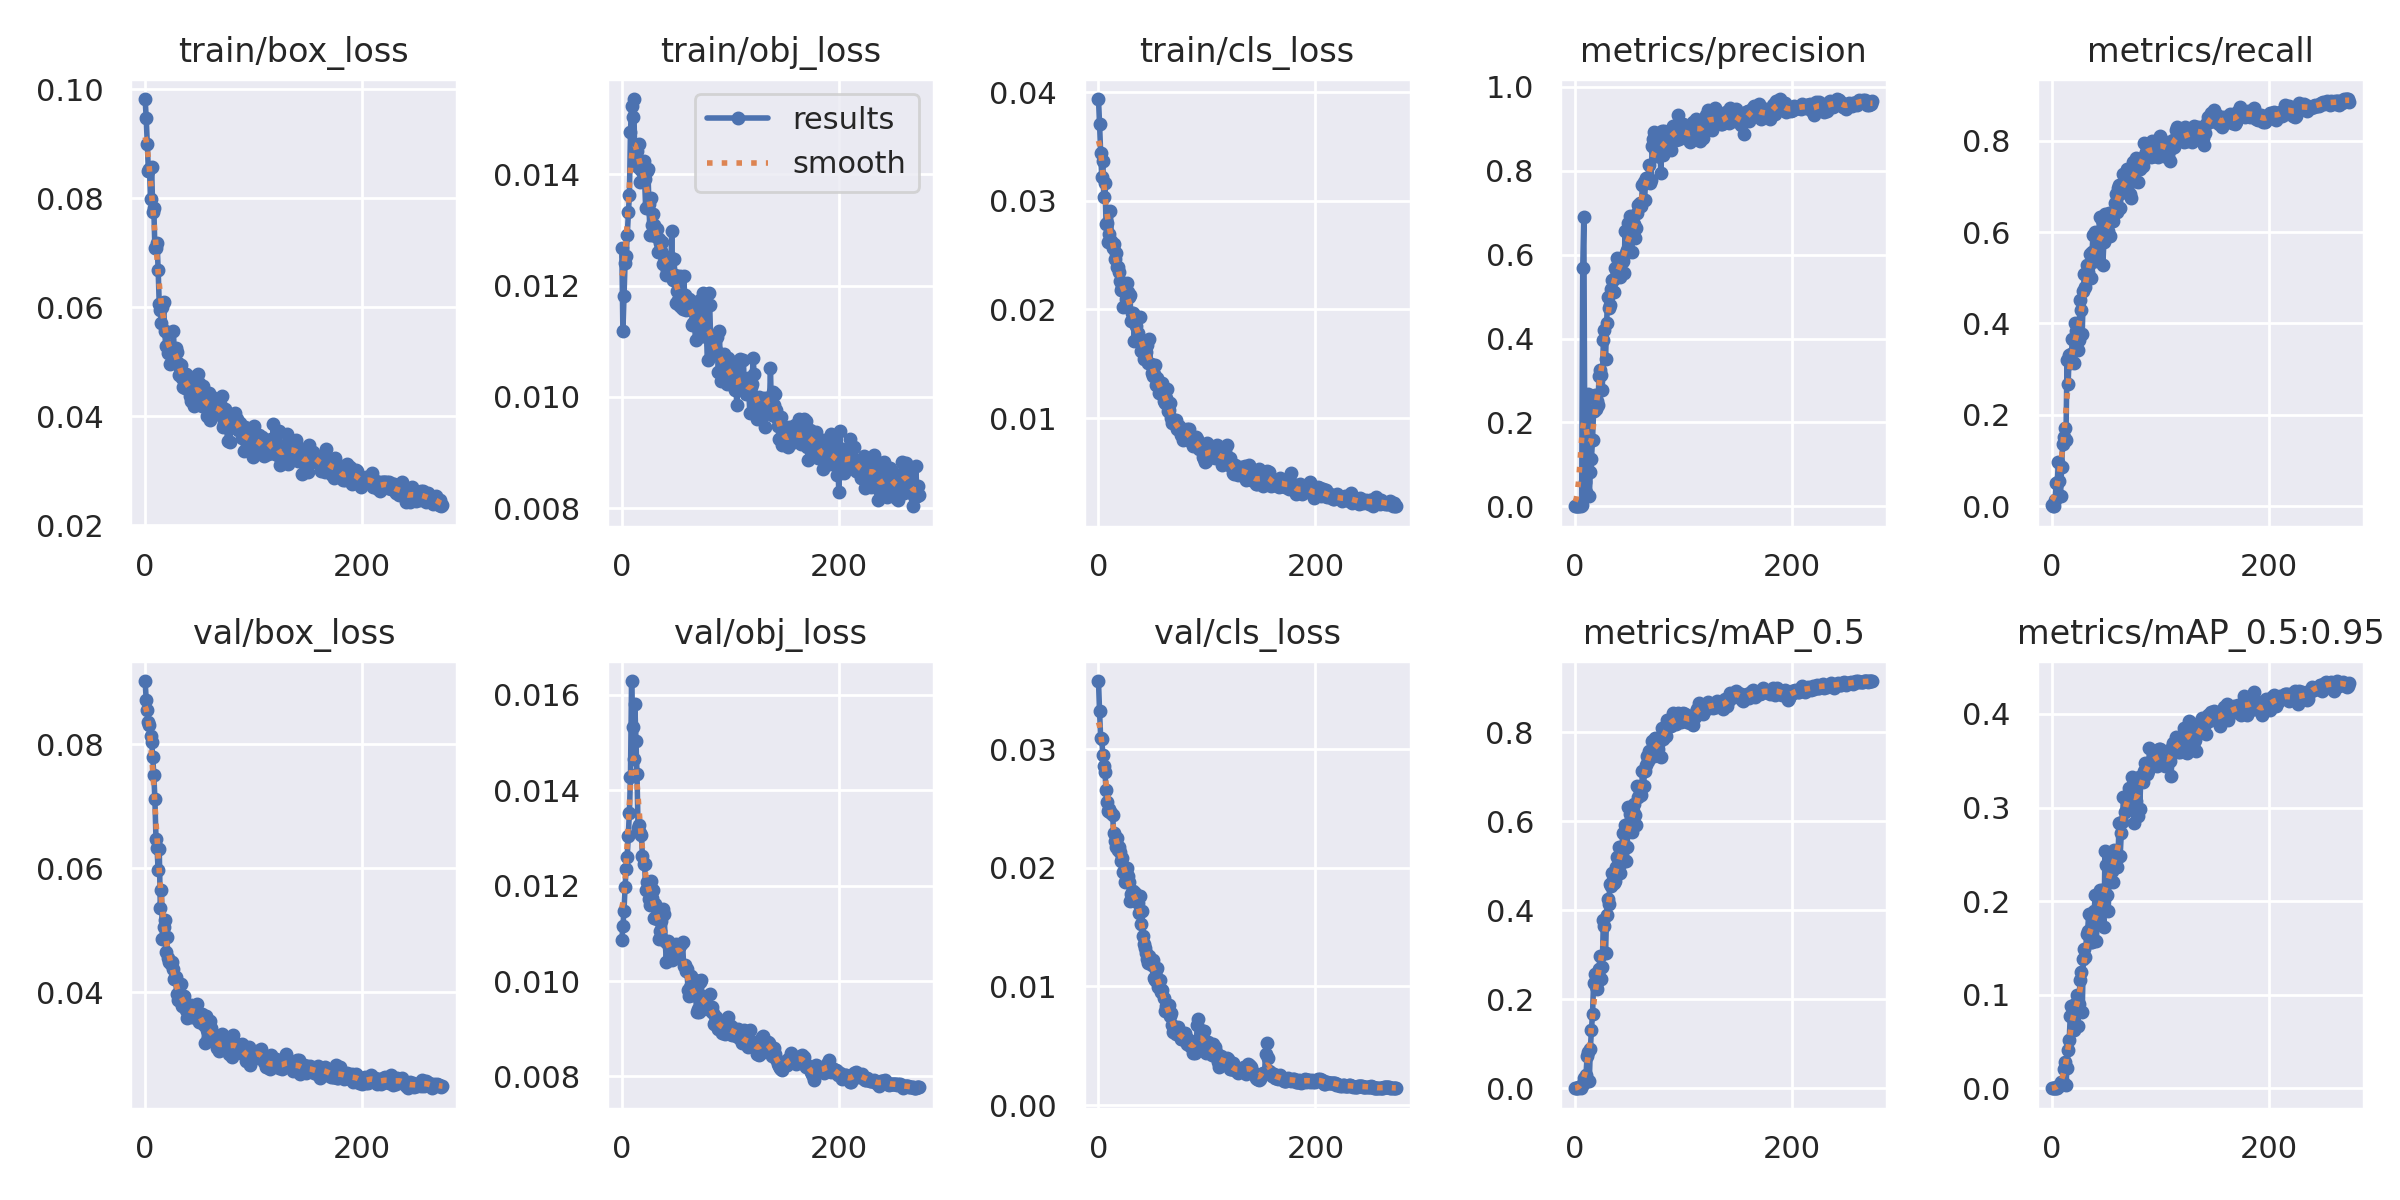

In [18]:
Image.open(png_arr[3])

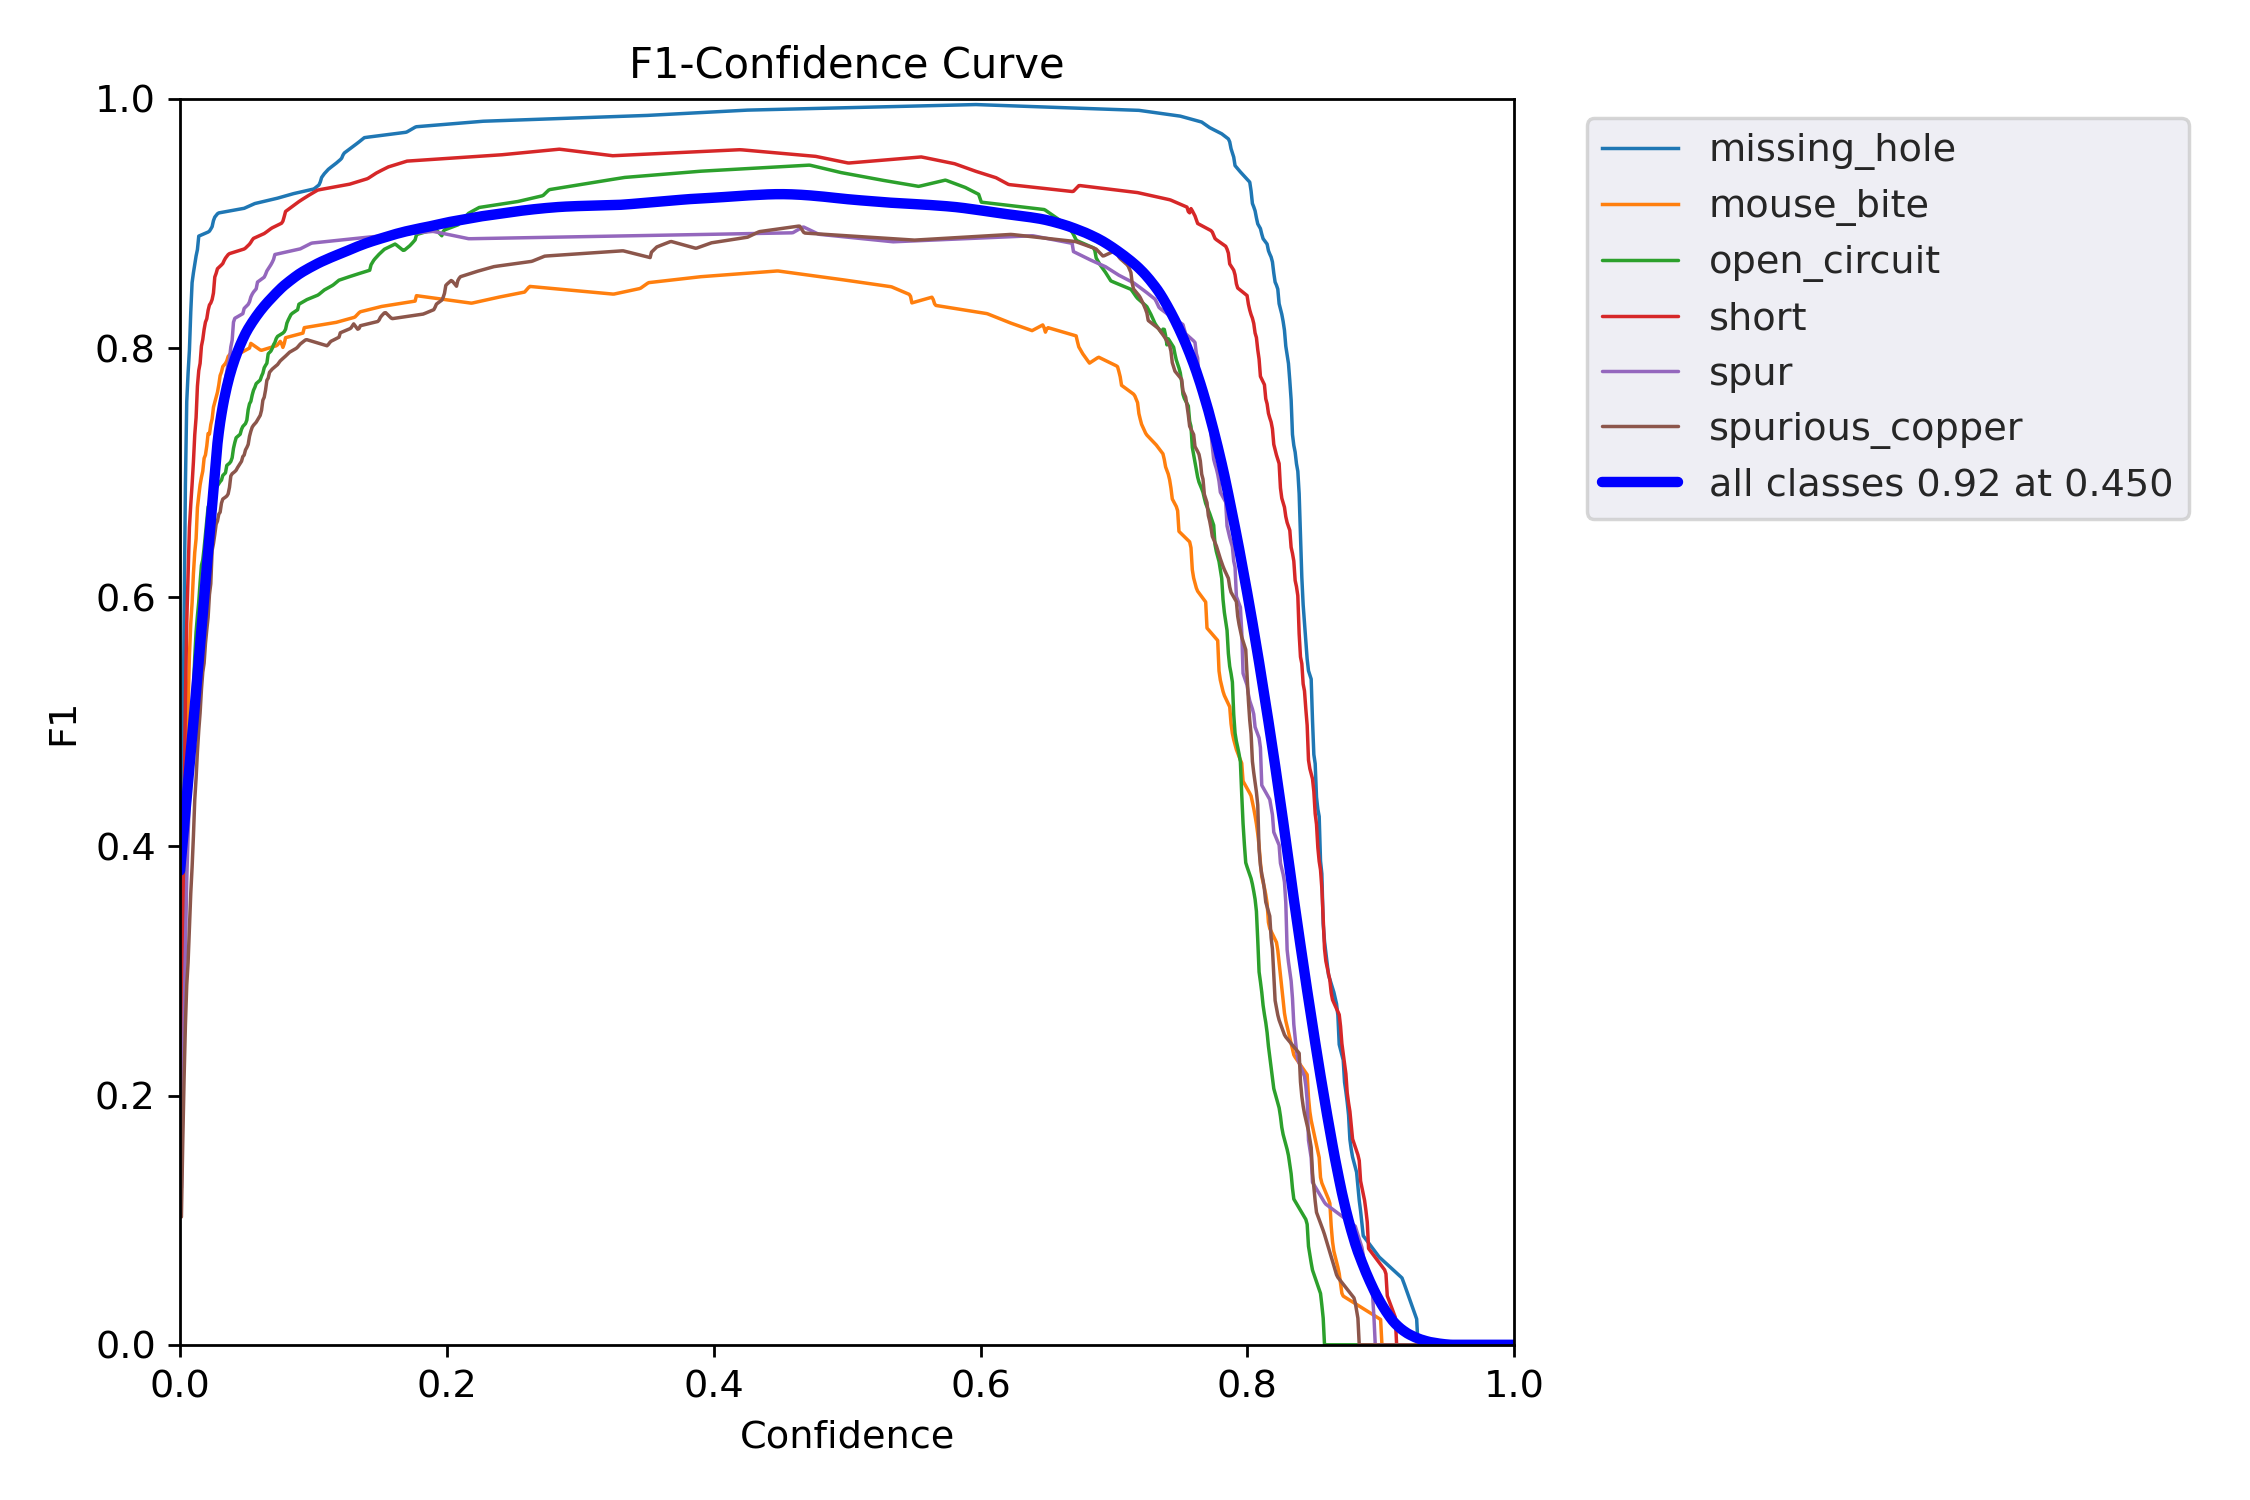

In [19]:
Image.open(png_arr[4])

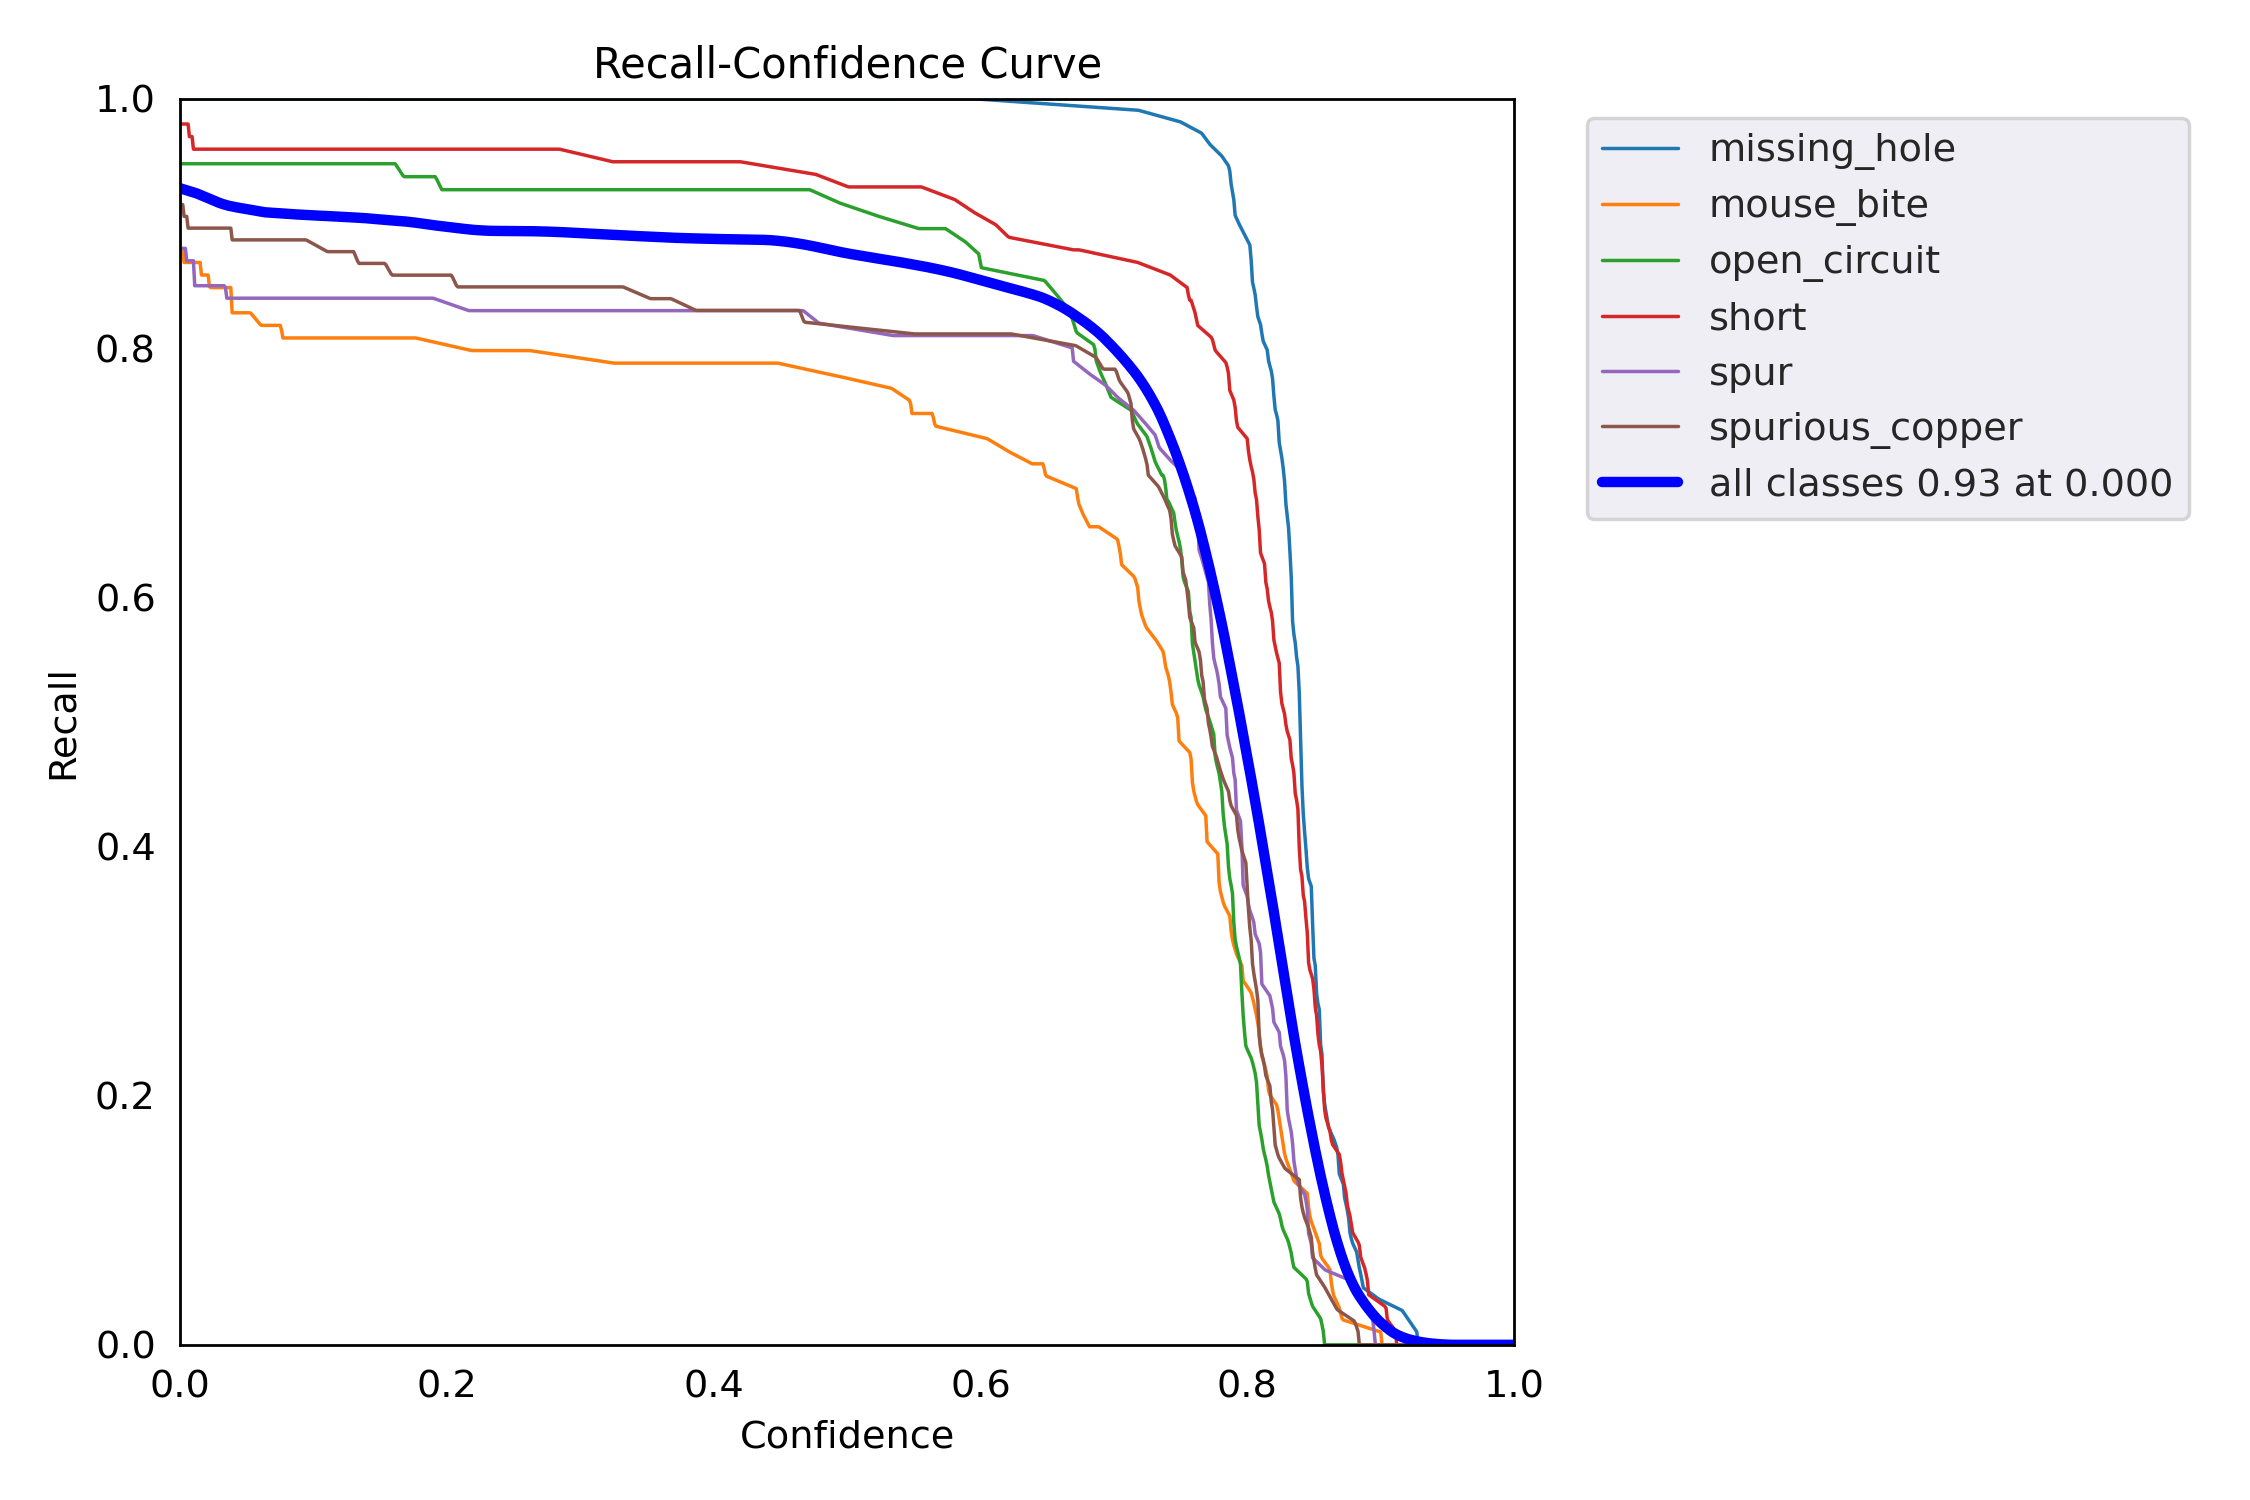

In [20]:
Image.open(png_arr[5])

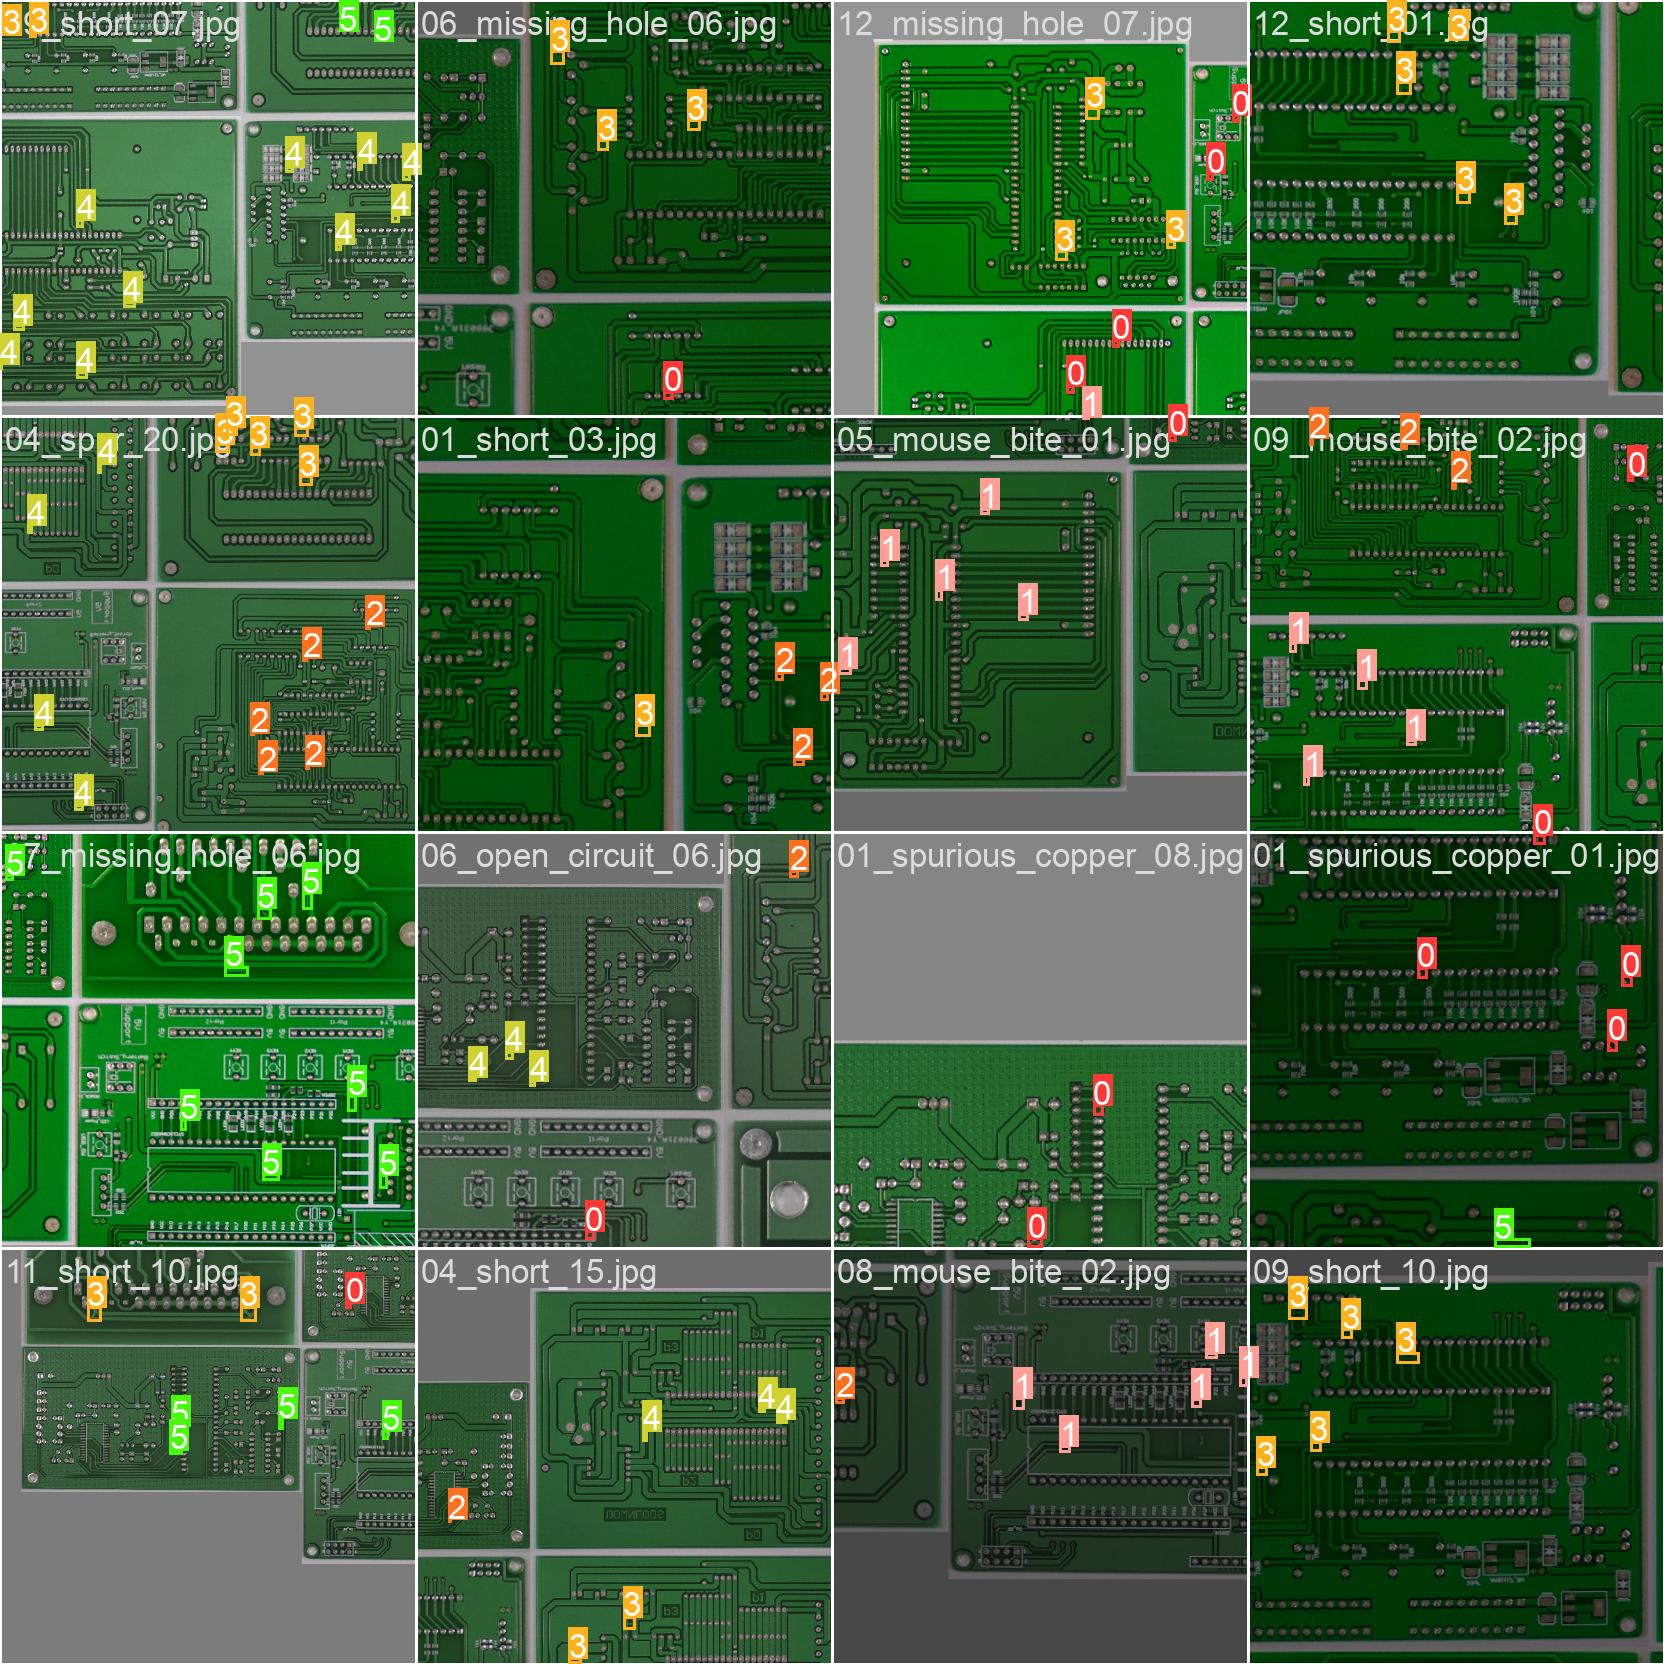

In [21]:
Image.open(jpg_arr[0])

# Training and val error


In [25]:
#adding the run into a dataframe
import pandas as pd
import matplotlib.pyplot as plt

#change {pcb_3rd4} into the run name
results = pd.read_csv("/content/yolov5/runs/train/pcb_3rd4/results.csv")
results_df = pd.DataFrame(results)
results_df.head()

epoch        train/box_loss        train/obj_loss  \
0                     0              0.098188              0.012673   
1                     1              0.094692              0.011175   
2                     2              0.089848              0.011807   
3                     3              0.085041              0.012406   
4                     4              0.085431              0.012538   

         train/cls_loss     metrics/precision        metrics/recall  \
0              0.039367              0.000052              0.003367   
1              0.037059              0.000000              0.000000   
2              0.034397              0.000000              0.000000   
3              0.032217              0.000428              0.014577   
4              0.033684              0.000877              0.050966   

        metrics/mAP_0.5  metrics/mAP_0.5:0.95          val/box_loss  \
0              0.000027              0.000010              0.090229   
1              0.000000              0.000000              0.087137   
2              0.000000              0.000000              0.085489   
3              0.000226              0.000039              0.083676   
4              0.001762              0.000471              0.083130   

           val/obj_loss          val/cls_loss                 x/lr0  \
0              0.010853              0.035746              0.070857   
1              0.011144              0.033186              0.040833   
2              0.011472              0.030935              0.010786   
3              0.011975              0.030825              0.009892   
4              0.012353              0.029545              0.009892   

                  x/lr1                 x/lr2  
0              0.003238              0.003238  
1              0.006548              0.006548  
2              0.009833              0.009833  
3              0.009892              0.009892  
4              0.009892              0.009892

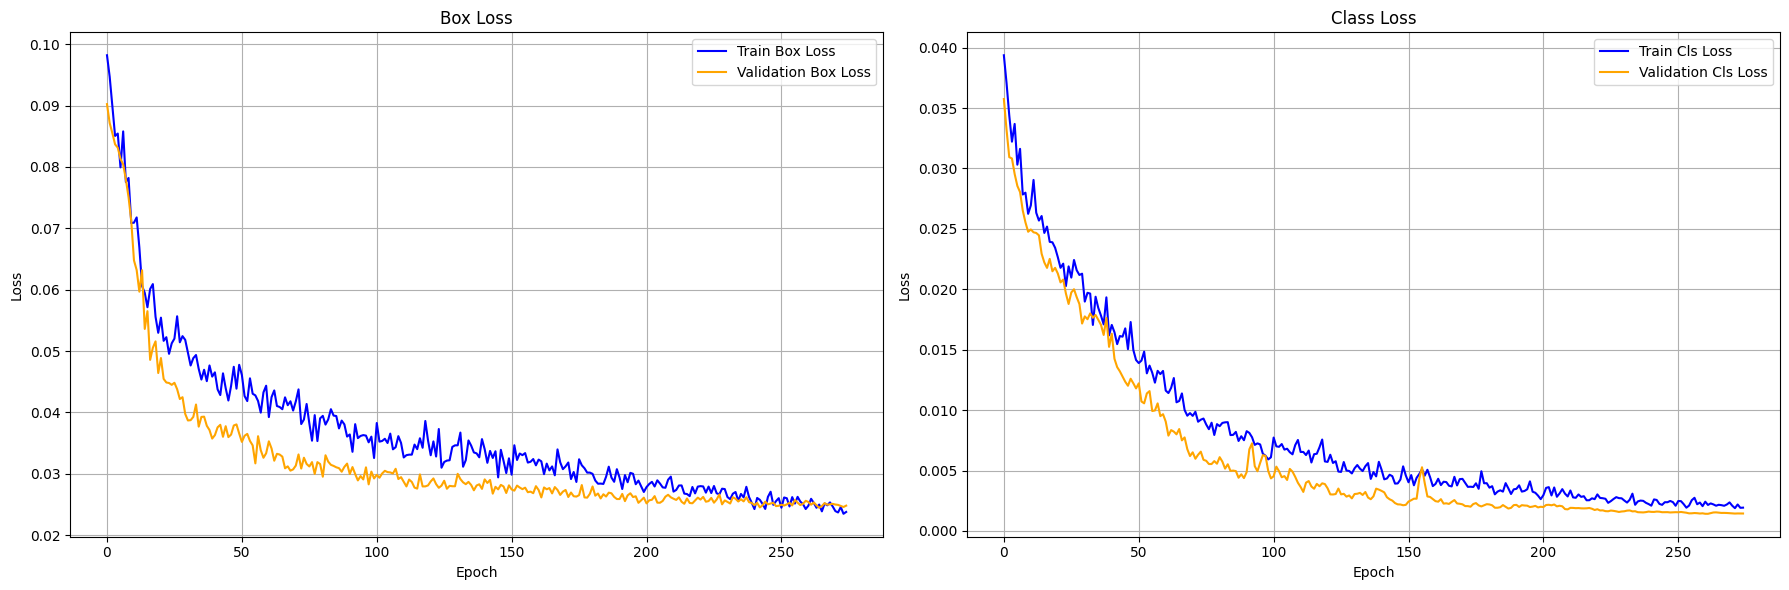

In [26]:
#showcasing the runs training error and validation error
epochs = results_df.iloc[:,0]
train_box_loss = results_df.iloc[:,1]
val_box_loss = results_df.iloc[:,8]
train_cls_loss = results_df.iloc[:,3]
val_cls_loss = results_df.iloc[:,10]

fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Plot box loss
axs[0].plot(epochs, train_box_loss, label='Train Box Loss', color='blue')
axs[0].plot(epochs, val_box_loss, label='Validation Box Loss', color='orange')
axs[0].set_title('Box Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].grid(True)

# Plot cls loss
axs[1].plot(epochs, train_cls_loss, label='Train Cls Loss', color='blue')
axs[1].plot(epochs, val_cls_loss, label='Validation Cls Loss', color='orange')
axs[1].set_title('Class Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[1].grid(True)


plt.tight_layout()
plt.show()

# Save the weights

the run best weights will be saved into the drive for further use

In [28]:
#save the weights of the run for future uses
save_path = os.path.join(data_dir, "saved_weights")
weight_path = os.path.join(folder_path, "weights", "best.pt")

os.makedirs(os.path.dirname(save_path), exist_ok=True)
shutil.copy(weight_path, save_path)

Weights saved to: /content/drive/MyDrive/yolodatasetprocessed/yoloData/saved_weights
